In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

filename = '/home/dneil/temp/datasets/rec1487839456_frames.hdf5'

In [2]:
dataset = h5py.File(filename, 'r')
print('Dataset contains:')
for key in dataset.keys():
    if np.prod(dataset[key].shape)<1e8:
        data = np.array(dataset[key])
    else:
        data = np.array(dataset[key][:1000])
    print('  {}, Min: {}, Mean: {}, Max: {}, size: {}'.format(
        key, np.min(data), np.mean(data), np.max(data), dataset[key].shape))

Dataset contains:
  accelerator_pedal_position, Min: 0.0, Mean: 4.70117194312, Max: 16.9, size: (4096,)
  aps_frame, Min: 0, Mean: 52.728037361, Max: 213, size: (4096, 260, 346)
  brake_pedal_status, Min: 0.0, Mean: 0.38427734375, Max: 1.0, size: (4096,)
  dvs_frame, Min: 0, Mean: 0.0, Max: 0, size: (4096, 260, 346)
  engine_speed, Min: 0.0, Mean: 1028.63525391, Max: 1882.0, size: (4096,)
  fuel_consumed_since_restart, Min: 0.0, Mean: 0.100744023437, Max: 0.164125, size: (4096,)
  fuel_level, Min: 0.0, Mean: 44.4110171968, Max: 44.782749, size: (4096,)
  headlamp_status, Min: 0.0, Mean: 0.0, Max: 0.0, size: (4096,)
  high_beam_status, Min: 0.0, Mean: 0.0, Max: 0.0, size: (4096,)
  ignition_status, Min: 0.0, Mean: 1.98388671875, Max: 2.0, size: (4096,)
  latitude, Min: 0.0, Mean: 47.0064941758, Max: 47.390308, size: (4096,)
  longitude, Min: 0.0, Mean: 8.45349545874, Max: 8.53034, size: (4096,)
  odometer, Min: 0.0, Mean: 36718.9936733, Max: 37008.835938, size: (4096,)
  parking_brake_s

In [3]:
def plot_steering_angle(angle):
    a_rad = angle / 180. * np.pi + np.pi / 2
    c, r = (173, 130), 65 #center, radius
    t = (c[0] + int(np.cos(a_rad) * r), c[1] - int(np.sin(a_rad) * r))
    plt.plot((c[0], t[0]), (c[1], t[1]), 'r')
    plt.gca().add_artist(plt.Circle(c, r, edgecolor='r', facecolor='none'))
    plt.text(c[0]-35, c[1]+30, '{:0.1f} deg'.format(angle), color='r')
print('Function defined.')

Function defined.


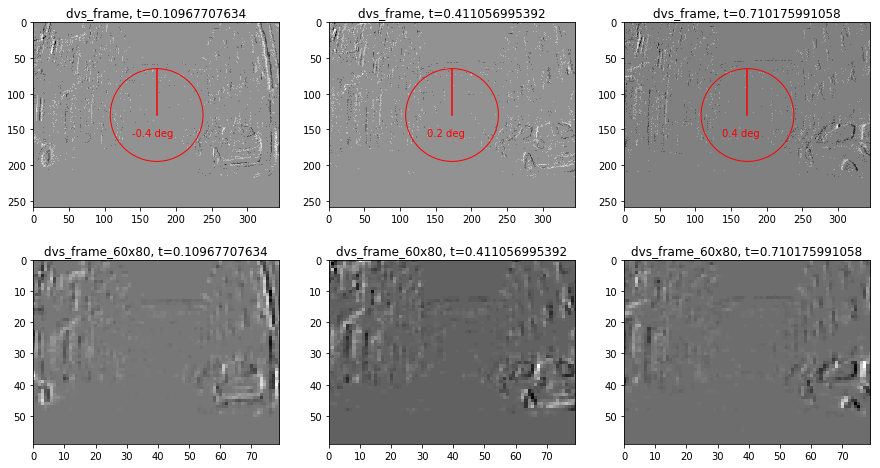

In [4]:
view_idx = 10
num_frames = 3
spacing = 30

filename = '/home/dneil/datasets/driving/rec1487839456_bin10ms.hdf5'
dataset = h5py.File(filename, 'r')

dataset_name = 'dvs_frame'
dataset_name2 = 'dvs_frame_60x80'

plt.figure(figsize=(5*num_frames,8))
for idx in range(num_frames):
    plt.subplot(2, num_frames, idx+1)
    plt.title('{}, t={}'.format(dataset_name, dataset['timestamp'][view_idx+idx*spacing]))
    plt.imshow(dataset[dataset_name][view_idx+idx*spacing], cmap='gray')
    plot_steering_angle(dataset['steering_wheel_angle'][view_idx+idx*spacing])
    plt.xlim([0, dataset[dataset_name][view_idx+idx*spacing].shape[1]-1])
    plt.ylim([dataset[dataset_name][view_idx+idx*spacing].shape[0]-1, 0])    

    plt.subplot(2, num_frames, num_frames+idx+1)
    plt.title('{}, t={}'.format(dataset_name2, dataset['timestamp'][view_idx+idx*spacing]))    
    plt.imshow(dataset[dataset_name2][view_idx+idx*spacing], cmap='gray')
#    plot_steering_angle(dataset['steering_wheel_angle'][view_idx+idx])
    plt.xlim([0, dataset[dataset_name2][view_idx+idx*spacing].shape[1]-1])
    plt.ylim([dataset[dataset_name2][view_idx+idx*spacing].shape[0]-1, 0]) 

dataset.close()
plt.savefig('resize.png')

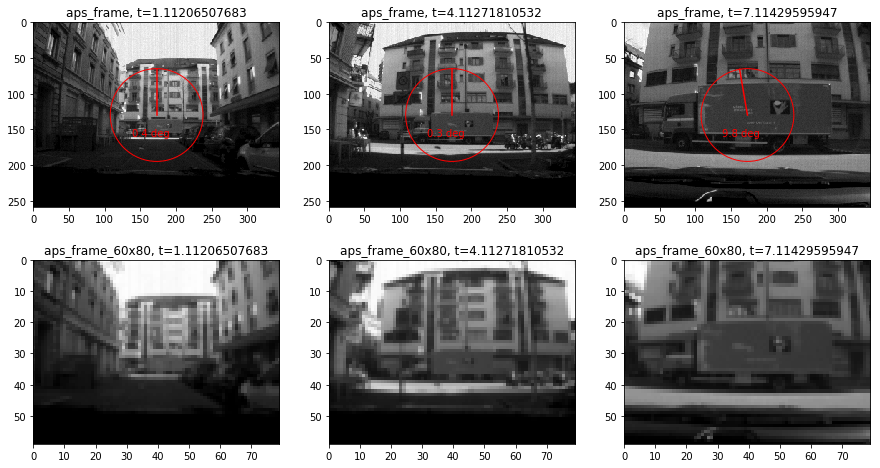

In [5]:
view_idx = 10
num_frames = 3
spacing = 30

filename = '/home/dneil/datasets/driving/rec1487839456_frames.hdf5'
dataset = h5py.File(filename, 'r')

dataset_name = 'aps_frame'
dataset_name2 = 'aps_frame_60x80'

plt.figure(figsize=(5*num_frames,8))
for idx in range(num_frames):
    plt.subplot(2, num_frames, idx+1)
    plt.title('{}, t={}'.format(dataset_name, dataset['timestamp'][view_idx+idx*spacing]))
    plt.imshow(dataset[dataset_name][view_idx+idx*spacing], cmap='gray')
    plot_steering_angle(dataset['steering_wheel_angle'][view_idx+idx*spacing])
    plt.xlim([0, dataset[dataset_name][view_idx+idx*spacing].shape[1]-1])
    plt.ylim([dataset[dataset_name][view_idx+idx*spacing].shape[0]-1, 0])    

    plt.subplot(2, num_frames, num_frames+idx+1)
    plt.title('{}, t={}'.format(dataset_name2, dataset['timestamp'][view_idx+idx*spacing]))    
    plt.imshow(dataset[dataset_name2][view_idx+idx*spacing], cmap='gray')
#    plot_steering_angle(dataset['steering_wheel_angle'][view_idx+idx])
    plt.xlim([0, dataset[dataset_name2][view_idx+idx*spacing].shape[1]-1])
    plt.ylim([dataset[dataset_name2][view_idx+idx*spacing].shape[0]-1, 0]) 

dataset.close()
plt.savefig('resize.png')

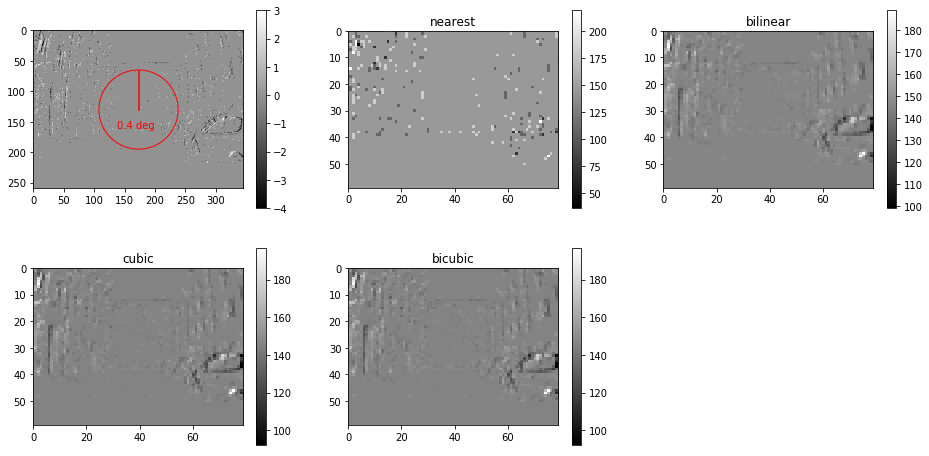

In [6]:
from scipy.misc import imresize

filename = '/home/dneil/datasets/driving/rec1487839456_bin10ms.hdf5'
dataset = h5py.File(filename, 'r')

dataset_name = 'dvs_frame'
dataset_name2 = 'dvs_frame_60x80'

view_idx = 80

def resize_int16(frame, size=(60,80), method='bilinear', climit=[-15,15]):
    # Assumes data is some small amount around the mean, i.e., DVS event sums
    return imresize((np.clip(frame, climit[0], climit[1]).astype('float32')+127), size, interp=method).astype('uint8')

plt.figure(figsize=(16,8))
plt.subplot(2, 3, 1)
plt.imshow(dataset[dataset_name][view_idx], cmap='gray')
plot_steering_angle(dataset['steering_wheel_angle'][view_idx])
plt.xlim([0, dataset[dataset_name][view_idx].shape[1]-1])
plt.ylim([dataset[dataset_name][view_idx].shape[0]-1, 0])    
plt.colorbar()

plt.subplot(2, 3, 2)
plt.imshow(resize_int16(dataset[dataset_name][view_idx], method='nearest'), cmap='gray')
plt.xlim([0, 80-1])
plt.ylim([60-1, 0])    
plt.colorbar()
plt.title('nearest')

plt.subplot(2, 3, 3)
plt.imshow(resize_int16(dataset[dataset_name][view_idx], method='bilinear'), cmap='gray')
plt.xlim([0, 80-1])
plt.ylim([60-1, 0])    
plt.colorbar()
plt.title('bilinear')

plt.subplot(2, 3, 4)
plt.imshow(resize_int16(dataset[dataset_name][view_idx], method='cubic'), cmap='gray')
plt.xlim([0, 80-1])
plt.ylim([60-1, 0])    
plt.colorbar()
plt.title('cubic')

plt.subplot(2, 3, 5)
plt.imshow(resize_int16(dataset[dataset_name][view_idx], method='bicubic'), cmap='gray')
plt.xlim([0, 80-1])
plt.ylim([60-1, 0])    
plt.colorbar()
plt.title('bicubic')

plt.savefig('with_float.png')


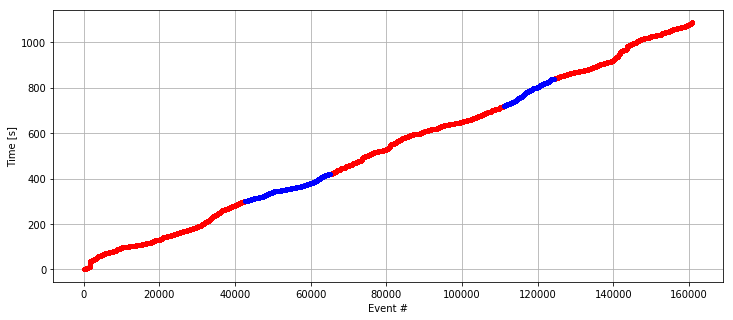

In [7]:
filename = '/home/dneil/datasets/driving/rec1487864316_bin5k.hdf5'
dataset = h5py.File(filename, 'r')
train_idxs = dataset['train_idxs']                    
test_idxs = dataset['test_idxs']                    
times = dataset['timestamp']
# orig_times = dataset['orig_timestamp']
plt.figure(figsize=(12,5))
# plt.plot(train_idxs, orig_times[train_idxs], 'g.')
# plt.plot(test_idxs, orig_times[test_idxs], 'g.')
plt.plot(train_idxs, times[train_idxs], 'r.')
plt.plot(test_idxs, times[test_idxs], 'b.')
# plt.title('Shared keys: {}'.format(set().intersection(dataset['train_idxs'], dataset['test_idxs'])))
plt.grid(which='both')
plt.ylabel('Time [s]')
plt.xlabel('Event #')
plt.savefig('timestamp_reset.png')

(0.0095391273498535156, 1087.3555250167847, 1087.3459858894348)


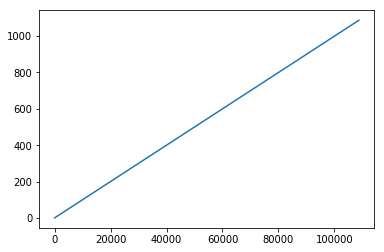

In [8]:
filename = '/home/dneil/datasets/driving/rec1487864316_bin10ms.hdf5'
f = h5py.File(filename, 'r')
times = np.array(f['timestamp'])
times[times==0] = np.nan
plt.plot(times)
print(np.nanmin(times), np.nanmax(times), np.nanmax(times)-np.nanmin(times))


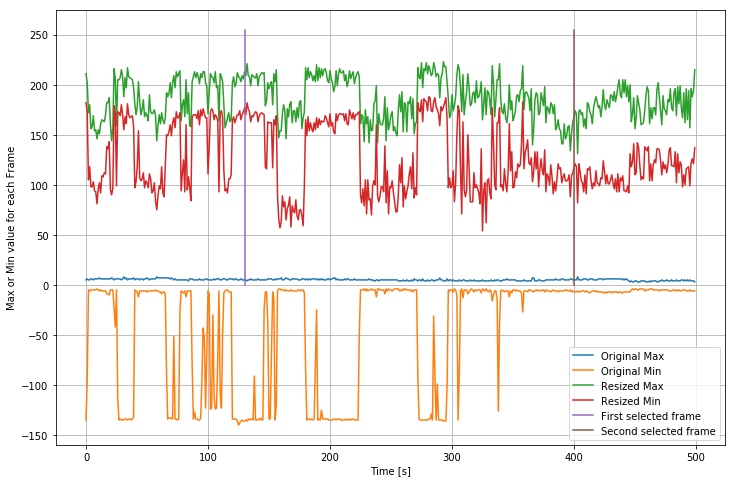

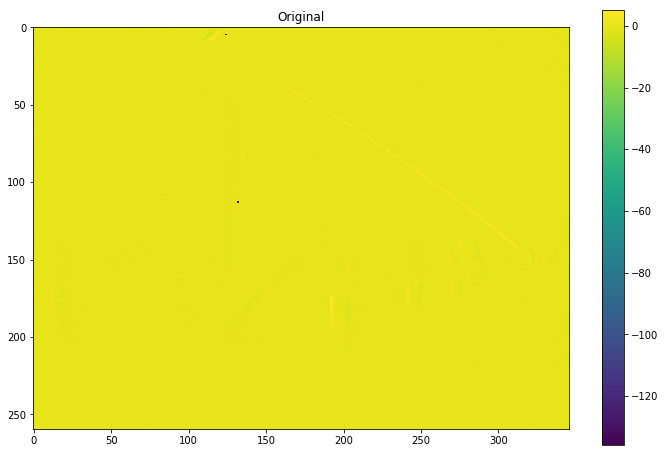

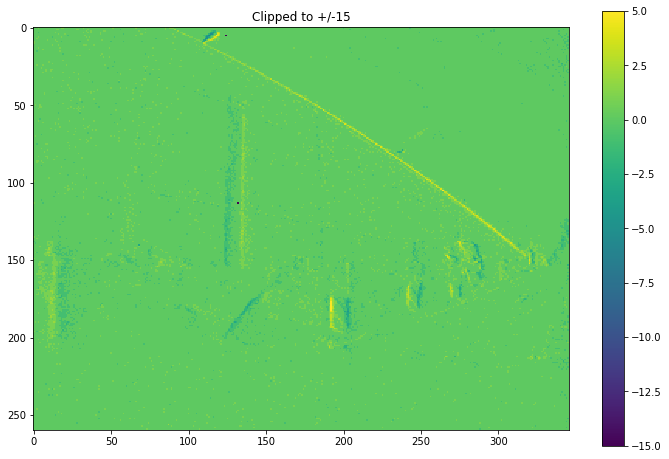

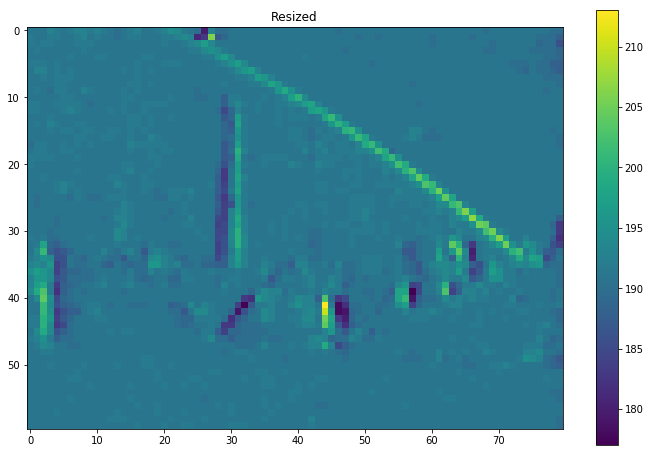

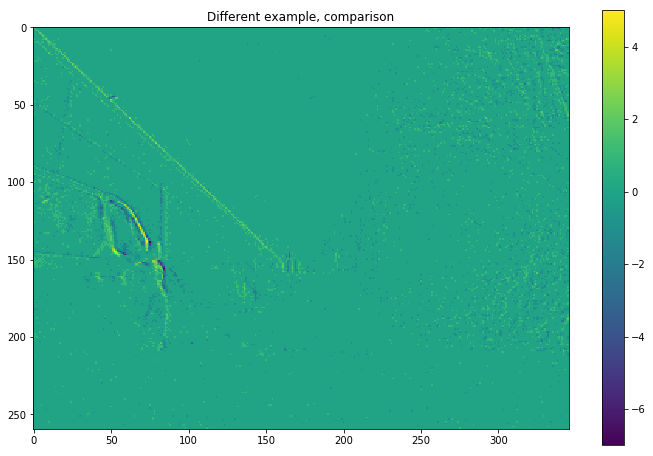

In [9]:
filename = '/home/dneil/datasets/driving/rec1487864316_bin10ms.hdf5'
scan_len = 500
zoom_1 = 130
zoom_2 = 400
orig_key = 'dvs_frame'
resized_key = 'dvs_frame_60x80'

f = h5py.File(filename, 'r')
maxes = np.zeros((scan_len,))
mins = np.zeros((scan_len,))
resized_maxes = np.zeros((scan_len,))
resized_mins = np.zeros((scan_len,))
for idx in range(scan_len):
    data = np.array(f[orig_key][idx])
    maxes[idx] = np.max(data)
    mins[idx] = np.min(data)
    
    resized_data = np.array(f[resized_key][idx])
    resized_maxes[idx] = np.max(resized_data)
    resized_mins[idx] = np.min(resized_data)
plt.figure(figsize=(12,8))
plt.plot(maxes, label='Original Max')
plt.plot(mins, label='Original Min')
plt.plot(resized_maxes, label='Resized Max')
plt.plot(resized_mins, label='Resized Min')
plt.plot([zoom_1, zoom_1], [0, 255], label='First selected frame')
plt.plot([zoom_2, zoom_2], [0, 255], label='Second selected frame')
plt.legend()
plt.grid(which='both')
plt.xlabel('Time [s]')
plt.ylabel('Max or Min value for each Frame')
plt.savefig('maxes_mins_dvs.png')

plt.figure(figsize=(12,8))
plt.imshow(f[orig_key][zoom_1])
plt.colorbar()
plt.title('Original')

plt.figure(figsize=(12,8))
plt.imshow(np.clip(f[orig_key][zoom_1], -15, 15))
plt.colorbar()
plt.title('Clipped to +/-15')

plt.figure(figsize=(12,8))
plt.imshow(f[resized_key][zoom_1])
plt.colorbar()
plt.title('Resized')

plt.figure(figsize=(12,8))
plt.imshow(f[orig_key][zoom_2])
plt.colorbar()
plt.title('Different example, comparison')
f.close()

Beginning write...
Done with 300 frames of data in 30.394261837s.


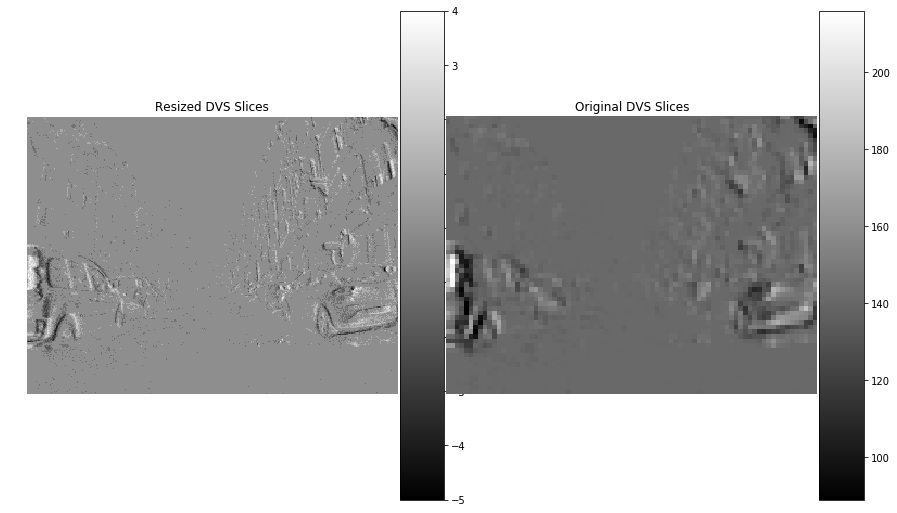

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import matplotlib.patches as mpatches
import time

view_idx = 10
num_frames = 300
spacing = 10
filename = '/home/dneil/datasets/driving/rec1487839456_bin10ms.hdf5'
dataset_name = 'dvs_frame'
dataset_name2 = 'dvs_frame_60x80'

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='DVS Debug Data')
writer = FFMpegWriter(fps=60, metadata=metadata, bitrate=-1, codec="libx264")
dataset = h5py.File(filename, 'r')

# Set up render
fig = plt.figure(figsize=(15,9))
ax1 =  plt.subplot2grid((1, 18), (0, 0), colspan=8)
cax1 = plt.subplot2grid((1, 18), (0, 8), colspan=1)
ax2 =  plt.subplot2grid((1, 18), (0, 9), colspan=8)
cax2 = plt.subplot2grid((1, 18), (0, 17), colspan=1)
plt.subplots_adjust(hspace=0.05, wspace=0.05)

# First plot
dvs_im = ax1.imshow(np.zeros((60, 80)), interpolation='nearest', cmap='gray')
ax1.set_title('Resized DVS Slices')
ax1.set_ylim([0, 59])
ax1.set_xlim([79, 0])
dvs_im.set_clim([-0.5, 0.5])
ax1.axis('off')
ax1.invert_yaxis()
cb1 = fig.colorbar(dvs_im, cax=cax1)

# Second plot
dvs_im2 = ax2.imshow(np.zeros((260, 346)), interpolation='nearest', cmap='gray')
ax2.set_title('Original DVS Slices')
ax2.set_ylim([0, 260-1])
ax2.set_xlim([346-1, 0])
dvs_im2.set_clim([-0.5, 0.5])
ax2.axis('off')
ax2.invert_yaxis()
cb1 = fig.colorbar(dvs_im2, cax=cax2)

print('Beginning write...')
with writer.saving(fig, 'driving_dvs_out.mp4', 100):
    start_time = time.time()    
    for idx in range(num_frames):
        data_1 = dataset[dataset_name][view_idx+idx*spacing]
        dvs_im.set_data(data_1)
        dvs_im.set_clim(np.min(data_1), np.max(data_1))

        dvs_im2.set_data(dataset[dataset_name2][view_idx+idx*spacing])
        data_2 = dataset[dataset_name2][view_idx+idx*spacing]
        dvs_im2.set_data(data_2)
        dvs_im2.set_clim(np.min(data_2), np.max(data_2))        
        writer.grab_frame()                         

dataset.close()
print('Done with {} frames of data in {}s.'.format(num_frames, time.time()-start_time))